# EDA ANALYSIS OF THE TITANIC DATA

In [149]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [150]:
#Function to load the file
def wrangle(filepath):
    df = pd.read_csv(filepath)

    return df

In [151]:
# Load data
df = wrangle(r'C:\Users\User\Desktop\projects_data\titanic.csv')


In [152]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
# To fill in missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

In [156]:
# To drop cabin column. Has many missing
df.drop(columns=["Cabin"], inplace = True)

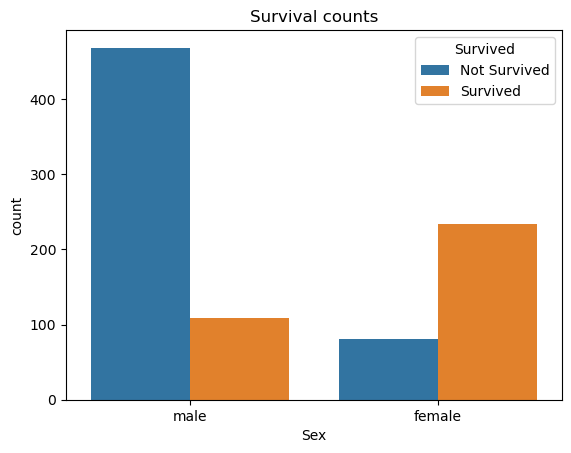

In [157]:
# EDA Analysis for categorical variables
# To visualize the survivers
sns.countplot(x= "Sex", hue="Survived", data = df)
# Show the legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
# Add title 
plt.title("Survival counts")
plt.show();

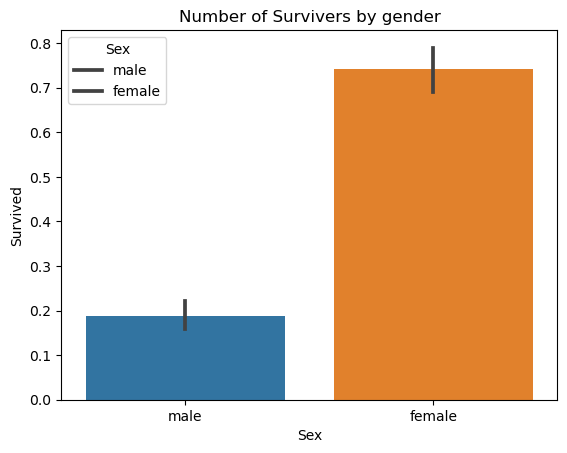

In [158]:

sns.barplot(x="Sex", y="Survived", data =df)
plt.title("Number of Survivers by gender")
plt.legend(title="Sex", labels = ["male", "female"])
plt.show();

In [159]:
# Survivors distribution by age
# To sepparate survivors and non-survivors
survivors = df[df["Survived"] == 1]
non_survivors = df[df["Survived"] == 0]

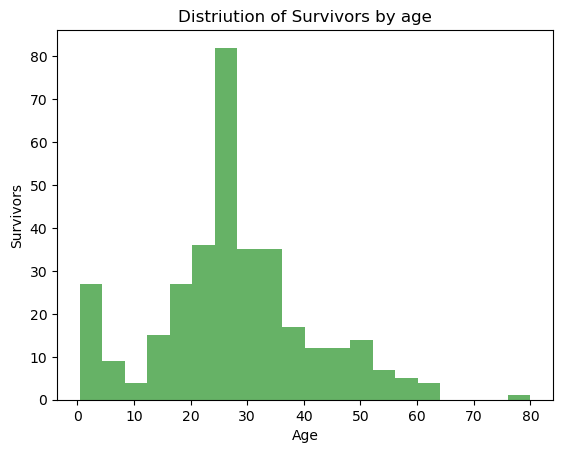

In [160]:
plt.hist(survivors["Age"], bins=20, alpha = 0.6, label = "Survived", color="green" )
plt.xlabel("Age")
plt.ylabel("Survivors")
plt.title("Distriution of Survivors by age");

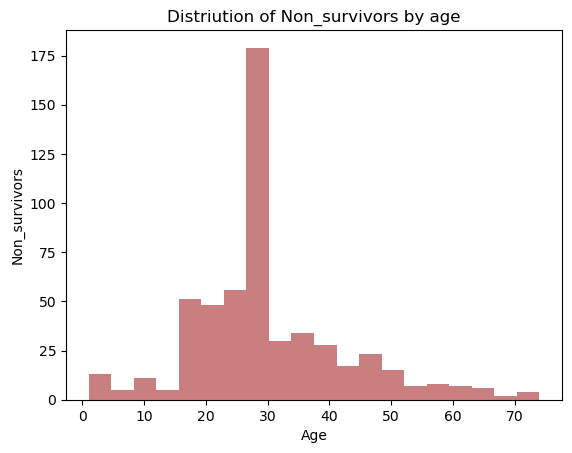

In [161]:
plt.hist(non_survivors["Age"], bins = 20, alpha = 0.6, label="Non_survivors", color="brown")
plt.xlabel("Age")
plt.ylabel("Non_survivors")
plt.title("Distriution of Non_survivors by age");

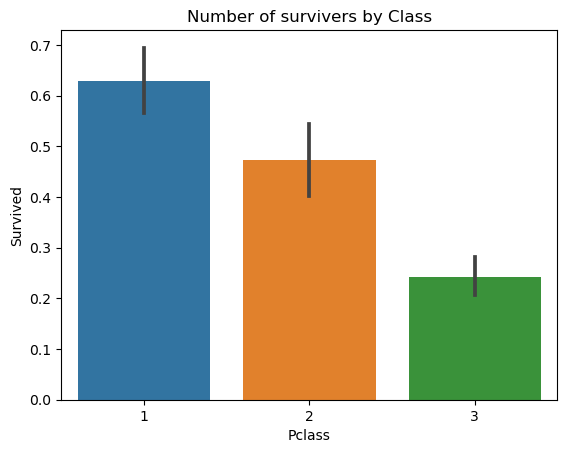

In [162]:
sns.barplot(x="Pclass", y= "Survived", data = df)
plt.title("Number of survivers by Class")
plt.show();

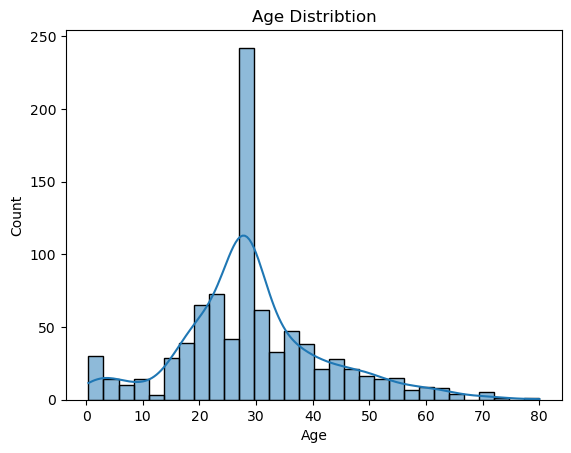

In [163]:
# EDA analysis for numerical variables
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Age Distribtion")
plt.show;

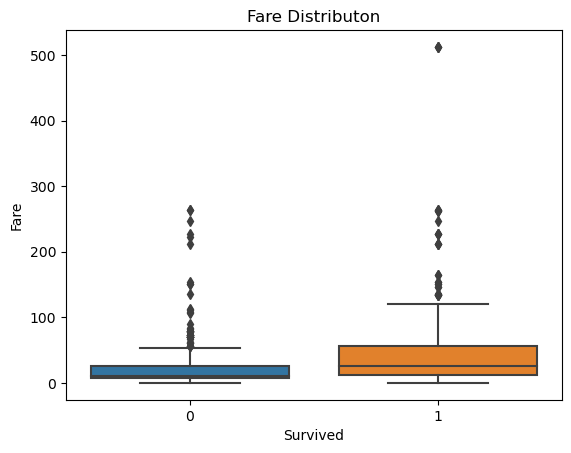

In [164]:
sns.boxplot(x="Survived", y="Fare", data=df);
plt.title("Fare Distributon")
plt.show();

In [165]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [125]:
# Encoding useful categorical columns
df["Sex"] = df["Sex"].map({"male":0, "female":1})

In [126]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first = True)

In [127]:
# To drop multi colineality and leaky columns 
df.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

In [128]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [129]:
# To split data in feature and target variable
X = df.drop(columns=["Survived"])
y = df["Survived"]


In [130]:
# To split further into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [131]:
# Create a model using Logistic regression
# To intantiate model and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# T make predictions usig the model
y_pred = model.predict(X_test)

# TO evaluate accuracy
print(f"Accuracy score: {round(accuracy_score(y_test, y_pred),2)}")

Accuracy score: 0.81


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
# Random forest model
#To intantiate and fit the model
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

# To make predictions
y_pred = model_rf.predict(X_test)

# To evaluate modelsaccuracy
print(f"{round(accuracy_score(y_test, y_pred), 4)}")

0.8101


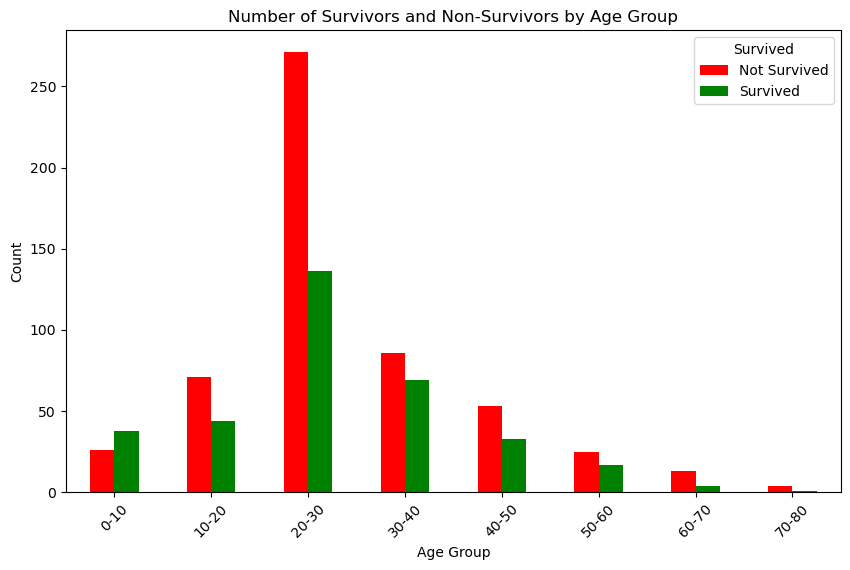

In [167]:
import numpy as np

# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by age group and survival status
age_survival = df.groupby(['AgeGroup', 'Survived']).size().unstack()

# Plot the grouped bar chart
age_survival.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'green'])

# Add labels and title
plt.title('Number of Survivors and Non-Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()